In [3]:
import pandas as pd

# Load the dataset
combined_df = pd.read_csv("/Users/faizanshamsi/Downloads/combined_data.csv")  # Replace with the correct folder path")

# Preview the data
print(combined_df.head())
print(combined_df.info())


                     identifier-label  identifier-label 2  \
0  Post-IPO Debt - Earth Science Tech  Earth Science Tech   
1        Debt Financing - 275 Funding         275 Funding   
2            Pre Seed Round - Notchup             Notchup   
3            Angel Round - ZenPrivata          ZenPrivata   
4                Series A - CharterUP           CharterUP   

  component--field-formatter component--field-formatter 2  \
0              Post-IPO Debt                  $350,000.00   
1             Debt Financing               $27,910,858.00   
2                   Pre-Seed                  $100,000.00   
3                      Angel                            —   
4                   Series A               $60,000,000.00   

  component--field-formatter 3                  accent            accent 2  \
0                  Oct 8, 2022             Health Care       Nutraceutical   
1                  Oct 6, 2022                 Finance  Financial Services   
2                  Oct 7, 2022  

/var/folders/_m/rkc37cnn59n8lk8jg8snrq600000gn/T/ipykernel_57738/1643332501.py:4: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv("/Users/faizanshamsi/Downloads/combined_data.csv")  # Replace with the correct folder path")


In [4]:
combined_df = combined_df.drop_duplicates()
print(f"Total rows after removing duplicates: {len(combined_df)}")


Total rows after removing duplicates: 66001


In [5]:
print(combined_df.isnull().sum())

identifier-label                     0
identifier-label 2                   0
component--field-formatter           0
component--field-formatter 2         0
component--field-formatter 3         0
accent                            1447
accent 2                          8626
accent 3                         16645
accent 4                         39053
component--field-formatter 5         0
component--field-formatter 6         0
component--field-formatter 7         0
component--field-formatter 8         1
component--field-formatter 9         0
component--field-formatter 10     1000
accent 6                            92
accent 7                             0
accent 6.1                       65001
dtype: int64


In [6]:
# List of columns to drop
columns_to_drop = ["accent 2", "accent 3", "accent 4", "accent 6.1"]  # Replace with actual column names

# Drop the specified columns
combined_df = combined_df.drop(columns=columns_to_drop)

# Verify the changes
print(combined_df.columns)

Index(['identifier-label', 'identifier-label 2', 'component--field-formatter',
       'component--field-formatter 2', 'component--field-formatter 3',
       'accent', 'component--field-formatter 5',
       'component--field-formatter 6', 'component--field-formatter 7',
       'component--field-formatter 8', 'component--field-formatter 9',
       'component--field-formatter 10', 'accent 6', 'accent 7'],
      dtype='object')


In [7]:
#allows for renaming of columns
print(combined_df.columns)
column_mapping = {
    "identifier-label 2": "Company",
    "component--field-formatter": "Funding Type",
    "component--field-formatter 2": "Money Raised",
    "component--field-formatter 3": "Date",
    "accent": "Industry 1",
    "component--field-formatter 5": "Total Funding Amount",
    "component--field-formatter 6": "Funding Status",
    "component--field-formatter 7": "Number of Investors",
    "component--field-formatter 8": "CB Rank",
    "component--field-formatter 9": "Organization Revenue Range",
    "component--field-formatter 10": "Number of funding Rounds",
    "accent 6": "City",
    "accent 7": "State",
    
    # Add more mappings as needed
}
combined_df = combined_df.rename(columns=column_mapping)
print(combined_df.columns)

Index(['identifier-label', 'identifier-label 2', 'component--field-formatter',
       'component--field-formatter 2', 'component--field-formatter 3',
       'accent', 'component--field-formatter 5',
       'component--field-formatter 6', 'component--field-formatter 7',
       'component--field-formatter 8', 'component--field-formatter 9',
       'component--field-formatter 10', 'accent 6', 'accent 7'],
      dtype='object')
Index(['identifier-label', 'Company', 'Funding Type', 'Money Raised', 'Date',
       'Industry 1', 'Total Funding Amount', 'Funding Status',
       'Number of Investors', 'CB Rank', 'Organization Revenue Range',
       'Number of funding Rounds', 'City', 'State'],
      dtype='object')


In [8]:
columns_to_drop = ["identifier-label"]  # Replace with actual column names

# Drop the specified columns
combined_df = combined_df.drop(columns=columns_to_drop)

# Verify the changes
print(combined_df.columns)

Index(['Company', 'Funding Type', 'Money Raised', 'Date', 'Industry 1',
       'Total Funding Amount', 'Funding Status', 'Number of Investors',
       'CB Rank', 'Organization Revenue Range', 'Number of funding Rounds',
       'City', 'State'],
      dtype='object')


In [9]:
print(combined_df.isnull().sum())

Company                          0
Funding Type                     0
Money Raised                     0
Date                             0
Industry 1                    1447
Total Funding Amount             0
Funding Status                   0
Number of Investors              0
CB Rank                          1
Organization Revenue Range       0
Number of funding Rounds      1000
City                            92
State                            0
dtype: int64


In [10]:
import numpy as np
# Replace all dashes in the entire DataFrame
combined_df = combined_df.replace(r"^\s*[-–—]\s*$", np.nan, regex=True)

# Verify null counts
print(combined_df.isnull().sum())

Company                           0
Funding Type                      0
Money Raised                  17773
Date                              0
Industry 1                     1447
Total Funding Amount          10614
Funding Status                25861
Number of Investors           16240
CB Rank                         415
Organization Revenue Range    27980
Number of funding Rounds       1000
City                             92
State                             0
dtype: int64


In [11]:
# Drop the specified columns
columns_to_drop = ["Funding Status", "CB Rank", "Organization Revenue Range"]
combined_df = combined_df.drop(columns=columns_to_drop)

# Verify the changes
print(combined_df.columns)  # This will display the remaining columns

Index(['Company', 'Funding Type', 'Money Raised', 'Date', 'Industry 1',
       'Total Funding Amount', 'Number of Investors',
       'Number of funding Rounds', 'City', 'State'],
      dtype='object')


In [12]:
print(combined_df.isnull().sum())

Company                         0
Funding Type                    0
Money Raised                17773
Date                            0
Industry 1                   1447
Total Funding Amount        10614
Number of Investors         16240
Number of funding Rounds     1000
City                           92
State                           0
dtype: int64


In [15]:
# Replace nulls in Industry 1 and City with "Unknown"
combined_df["Industry 1"] = combined_df["Industry 1"].fillna("Unknown")
combined_df["City"] = combined_df["City"].fillna("Unknown")


In [16]:
print(combined_df.isnull().sum())

Company                         0
Funding Type                    0
Money Raised                17773
Date                            0
Industry 1                      0
Total Funding Amount        10614
Number of Investors         16240
Number of funding Rounds     1000
City                            0
State                           0
dtype: int64


In [17]:
# Remove commas and convert to numeric
combined_df["Number of Investors"] = combined_df["Number of Investors"].replace({",": ""}, regex=True).astype(float)
combined_df["Number of funding Rounds"] = combined_df["Number of funding Rounds"].replace({",": ""}, regex=True).astype(float)

In [18]:
# Replace nulls in Industry 1 and City with "Unknown"
combined_df["Industry 1"] = combined_df["Industry 1"].fillna("Unknown")
combined_df["City"] = combined_df["City"].fillna("Unknown")

# Replace nulls in Number of Investors with the median
combined_df["Number of Investors"] = combined_df["Number of Investors"].fillna(combined_df["Number of Investors"].median())

# Replace nulls in Number of Funding Rounds with the median
combined_df["Number of funding Rounds"] = combined_df["Number of funding Rounds"].fillna(combined_df["Number of funding Rounds"].median())

In [19]:
print(combined_df.isnull().sum())

Company                         0
Funding Type                    0
Money Raised                17773
Date                            0
Industry 1                      0
Total Funding Amount        10614
Number of Investors             0
Number of funding Rounds        0
City                            0
State                           0
dtype: int64


In [21]:
# Replace non-numeric values with NaN
combined_df["Money Raised"] = combined_df["Money Raised"].replace({"[\$,]": ""}, regex=True)
combined_df["Money Raised"] = pd.to_numeric(combined_df["Money Raised"], errors="coerce")

In [22]:
# Clean "Total Funding Amount"
combined_df["Total Funding Amount"] = combined_df["Total Funding Amount"].replace({"[\$,]": ""}, regex=True)
combined_df["Total Funding Amount"] = pd.to_numeric(combined_df["Total Funding Amount"], errors="coerce")

# Replace NaN with 0
combined_df["Total Funding Amount"] = combined_df["Total Funding Amount"].fillna(0)

In [23]:
print(combined_df[["Money Raised", "Total Funding Amount"]].dtypes)
print(combined_df[["Money Raised", "Total Funding Amount"]].isnull().sum())
print(combined_df[["Money Raised", "Total Funding Amount"]].head())


Money Raised            float64
Total Funding Amount    float64
dtype: object
Money Raised            18488
Total Funding Amount        0
dtype: int64
   Money Raised  Total Funding Amount
0      350000.0             2255791.0
1    27910858.0            27910858.0
2      100000.0              230275.0
3           NaN                   0.0
4    60000000.0            60000000.0


In [24]:
# Replace NaN with 0
combined_df["Money Raised"] = combined_df["Money Raised"].fillna(0)

In [25]:
combined_df["Total Funding Amount"] = combined_df["Total Funding Amount"].fillna(0)

In [26]:
print(combined_df.isnull().sum())

Company                     0
Funding Type                0
Money Raised                0
Date                        0
Industry 1                  0
Total Funding Amount        0
Number of Investors         0
Number of funding Rounds    0
City                        0
State                       0
dtype: int64


In [28]:
# Group by Industry and calculate the total money raised
industry_funding = combined_df.groupby("Industry 1")["Money Raised"].sum().sort_values(ascending=False)

# Convert the result to a DataFrame for easier display
top_industries = industry_funding.reset_index()
top_industries.columns = ["Industry", "Total Money Raised"]

# Display the top 10 industries by money raised
print("Top Industries by Total Money Raised:")
print(top_industries.head(10))


Top Industries by Total Money Raised:
                       Industry  Total Money Raised
0                 Biotechnology        2.176673e+11
1                        Energy        2.004384e+11
2  Artificial Intelligence (AI)        1.511212e+11
3                    Automotive        8.128547e+10
4                   Health Care        7.224415e+10
5                       Finance        7.104233e+10
6                     Aerospace        7.048411e+10
7            Financial Services        6.798623e+10
8                       Banking        5.020371e+10
9                     Analytics        3.661718e+10


In [29]:
# Format the "Total Money Raised" column to display as dollar values
top_industries["Total Money Raised"] = top_industries["Total Money Raised"].apply(lambda x: "${:,.2f}".format(x))

# Display the formatted top 10 industries
print("Top Industries by Total Money Raised:")
print(top_industries.head(10))


Top Industries by Total Money Raised:
                       Industry   Total Money Raised
0                 Biotechnology  $217,667,280,419.00
1                        Energy  $200,438,444,339.00
2  Artificial Intelligence (AI)  $151,121,231,903.00
3                    Automotive   $81,285,468,476.00
4                   Health Care   $72,244,146,857.00
5                       Finance   $71,042,333,574.00
6                     Aerospace   $70,484,110,102.00
7            Financial Services   $67,986,232,195.00
8                       Banking   $50,203,707,871.00
9                     Analytics   $36,617,180,879.00


In [30]:
print(combined_df["Money Raised"].sort_values(ascending=False).head(10))


6399     3.100000e+10
49350    2.850000e+10
6580     2.300000e+10
36494    1.581000e+10
18880    1.300000e+10
58191    1.100000e+10
26962    1.050000e+10
46172    1.000000e+10
4824     1.000000e+10
53009    1.000000e+10
Name: Money Raised, dtype: float64


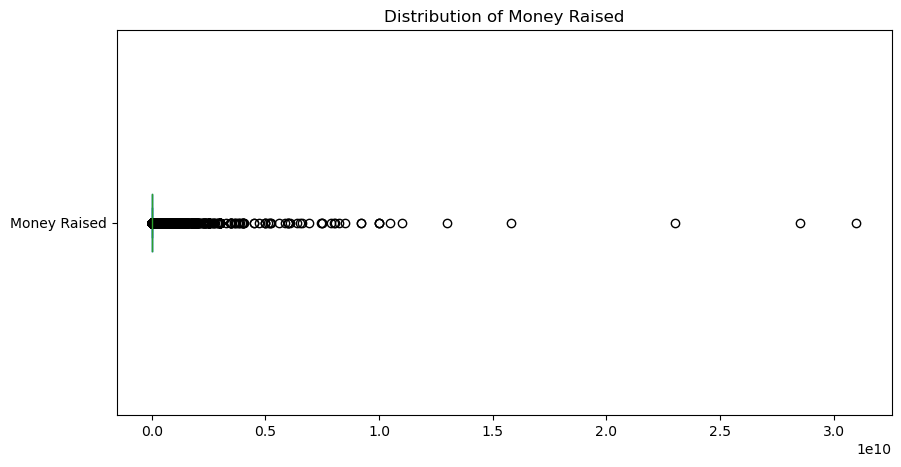

In [31]:
import matplotlib.pyplot as plt
combined_df["Money Raised"].plot(kind="box", vert=False, figsize=(10, 5))
plt.title("Distribution of Money Raised")
plt.show()


In [32]:
print(combined_df[combined_df["Money Raised"] > 1e+10])

                    Company   Funding Type  Money Raised          Date  \
6399                 Pfizer  Post-IPO Debt  3.100000e+10  May 16, 2023   
6580                Ovintiv  Post-IPO Debt  2.300000e+10  May 16, 2023   
18880  Bristol-Myers Squibb  Post-IPO Debt  1.300000e+10  Feb 14, 2024   
26962                Kroger  Post-IPO Debt  1.050000e+10  Aug 20, 2024   
36494    The Boeing Company  Post-IPO Debt  1.581000e+10  Oct 14, 2024   
49350                 Amgen  Post-IPO Debt  2.850000e+10  Dec 12, 2022   
58191  Pattern Energy Group  Post-IPO Debt  1.100000e+10  Dec 27, 2023   

          Industry 1  Total Funding Amount  Number of Investors  \
6399   Biotechnology          3.200000e+10                  1.0   
6580          Energy          2.341690e+10                  1.0   
18880  Biotechnology          2.358000e+10                  1.0   
26962        Grocery          1.105000e+10                  1.0   
36494      Aerospace          2.773504e+10                  5.0   
49350

In [33]:
# Count rows with "Post-IPO Debt" in the Funding Type column
post_ipo_debt_count = combined_df[combined_df["Funding Type"] == "Post-IPO Debt"].shape[0]

print(f"Number of rows with 'Post-IPO Debt': {post_ipo_debt_count}")

Number of rows with 'Post-IPO Debt': 1677


In [34]:
# Display the first few rows with "Post-IPO Debt"
post_ipo_debt_rows = combined_df[combined_df["Funding Type"] == "Post-IPO Debt"]
print(post_ipo_debt_rows.head())

                       Company   Funding Type  Money Raised          Date  \
0           Earth Science Tech  Post-IPO Debt      350000.0   Oct 8, 2022   
461            Replimune Group  Post-IPO Debt   200000000.0   Oct 7, 2022   
587  Realty Income Corporation  Post-IPO Debt   750000000.0   Oct 3, 2022   
595       Petro-Victory Energy  Post-IPO Debt     1700000.0   Oct 6, 2022   
629        PROCEPT BioRobotics  Post-IPO Debt    52000000.0  Oct 10, 2022   

             Industry 1  Total Funding Amount  Number of Investors  \
0           Health Care          2.255791e+06                  1.0   
461       Biotechnology          1.182000e+09                  1.0   
587  Financial Services          1.282596e+10                  1.0   
595              Energy          2.028590e+07                  1.0   
629         Health Care          8.203352e+08                  1.0   

     Number of funding Rounds            City          State  
0                         2.0           Doral        

In [35]:
# Filter out rows with "Post-IPO Debt" in the Funding Type column
combined_df = combined_df[combined_df["Funding Type"] != "Post-IPO Debt"]

# Verify the exclusion
print(f"Number of rows after excluding Post-IPO Debt: {len(combined_df)}")
print(combined_df["Funding Type"].value_counts())  # Check the remaining funding types

Number of rows after excluding Post-IPO Debt: 64324
Funding Type
Grant                       17490
Seed                        13352
Pre-Seed                     7479
Venture - Series Unknown     6112
Series A                     4258
Debt Financing               2996
Post-IPO Equity              2119
Private Equity               2076
Series B                     2013
Non-equity Assistance        1700
Series C                      815
Convertible Note              789
Funding Round                 751
Angel                         577
Corporate Round               548
Series D                      351
Secondary Market              222
Equity Crowdfunding           213
Series E                      141
Post-IPO Secondary            134
Series F                       64
Product Crowdfunding           63
Initial Coin Offering          36
Series G                       14
Series H                        8
Series I                        3
Name: count, dtype: int64


In [40]:
industry_funding = combined_df.groupby("Industry 1")["Money Raised"].sum().sort_values(ascending=False)
print(industry_funding.head(10))

Industry 1
Artificial Intelligence (AI)    1.312787e+11
Biotechnology                   1.042350e+11
Energy                          7.134783e+10
Health Care                     5.065721e+10
Automotive                      3.867149e+10
Finance                         3.727408e+10
Financial Services              3.562070e+10
Biopharma                       3.113764e+10
Analytics                       2.767018e+10
Aerospace                       2.534361e+10
Name: Money Raised, dtype: float64


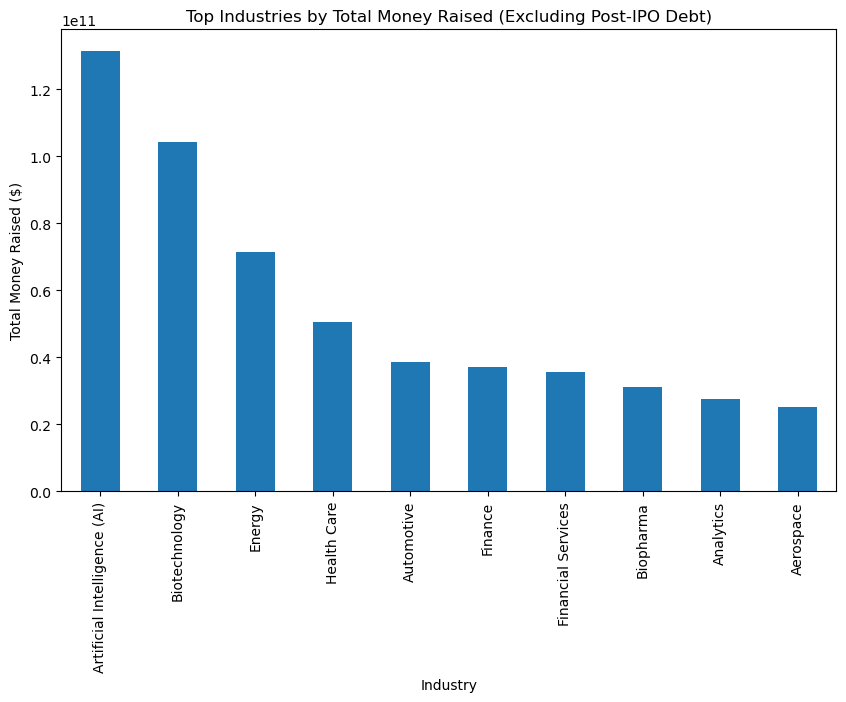

In [37]:
industry_funding.head(10).plot(kind="bar", figsize=(10, 6))
plt.title("Top Industries by Total Money Raised (Excluding Post-IPO Debt)")
plt.xlabel("Industry")
plt.ylabel("Total Money Raised ($)")
plt.show()

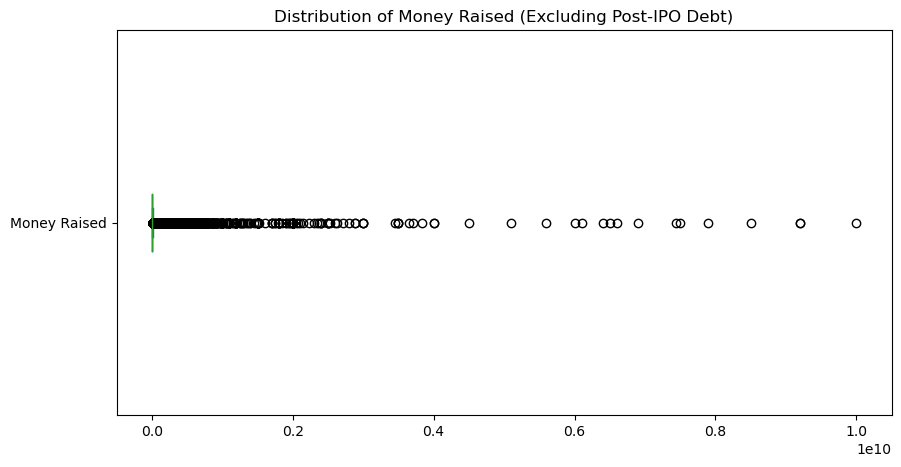

In [38]:
combined_df["Money Raised"].plot(kind="box", vert=False, figsize=(10, 5))
plt.title("Distribution of Money Raised (Excluding Post-IPO Debt)")
plt.show()

In [41]:
# Format the values as dollars
industry_funding_dollars = industry_funding.apply(lambda x: f"${x:,.2f}")

# Display the top 10 industries with formatted money raised
print("Top Industries by Total Money Raised (Formatted):")
print(industry_funding_dollars.head(10))


Top Industries by Total Money Raised (Formatted):
Industry 1
Artificial Intelligence (AI)    $131,278,681,903.00
Biotechnology                   $104,234,950,419.00
Energy                           $71,347,829,145.00
Health Care                      $50,657,207,553.00
Automotive                       $38,671,492,476.00
Finance                          $37,274,083,558.00
Financial Services               $35,620,703,445.00
Biopharma                        $31,137,635,794.00
Analytics                        $27,670,180,879.00
Aerospace                        $25,343,610,102.00
Name: Money Raised, dtype: object


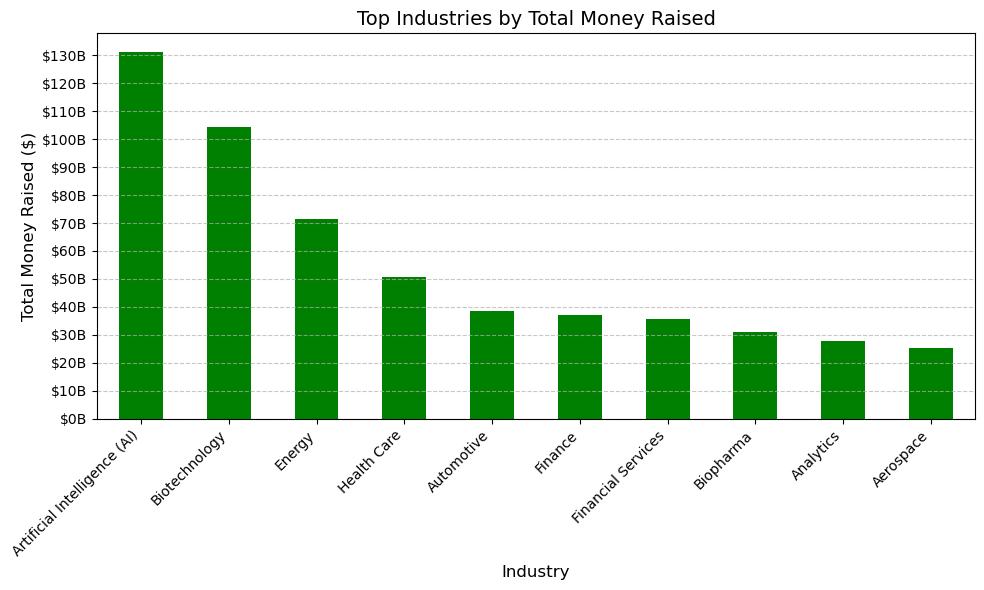

In [44]:
import matplotlib.ticker as ticker

# Convert the formatted values back to numeric for plotting
industry_funding_numeric = industry_funding.astype(float)

# Plot a bar chart for the top industries by total money raised
plt.figure(figsize=(10, 6))
ax = industry_funding_numeric.head(10).plot(kind="bar", color="green")
plt.title("Top Industries by Total Money Raised", fontsize=14)
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Total Money Raised ($)", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Set y-axis increments to 10 billion
ax.yaxis.set_major_locator(ticker.MultipleLocator(10e9))  # 10 billion
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x/1e9:.0f}B"))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [45]:
gdp_df = pd.read_csv("/Users/faizanshamsi/Downloads/GDP.csv")

interest_df = pd.read_csv("/Users/faizanshamsi/Downloads/interest.csv")

inflation_df = pd.read_csv("/Users/faizanshamsi/Downloads/inflation.csv")

unrate_df = pd.read_csv("/Users/faizanshamsi/Downloads/UNRATE.csv")

# Rename columns for GDP data
gdp_df.rename(columns={"GDP": "Gross Domestic Product", "DATE": "Date"}, inplace=True)

# Rename columns for interest rate data
interest_df.rename(columns={"DFF": "Federal Funds Rate", "DATE": "Date"}, inplace=True)

# Rename columns for inflation data
inflation_df.rename(columns={"CORESTICKM159SFRBATL": "Core Inflation Rate", "DATE": "Date"}, inplace=True)

# Rename columns for unemployment rate data
unrate_df.rename(columns={"UNRATE": "Unemployment Rate", "DATE": "Date"}, inplace=True)

# Display the updated tables
print(gdp_df.head())
print(interest_df.head())
print(inflation_df.head())
print(unrate_df.head())


         Date  Gross Domestic Product
0  2021-01-01               22656.793
1  2021-04-01               23368.861
2  2021-07-01               23921.991
3  2021-10-01               24777.038
4  2022-01-01               25215.491
         Date  Federal Funds Rate
0  2021-01-01                0.09
1  2021-01-02                0.09
2  2021-01-03                0.09
3  2021-01-04                0.09
4  2021-01-05                0.09
         Date  Core Inflation Rate
0  2021-01-01             1.400569
1  2021-02-01             1.405123
2  2021-03-01             1.592366
3  2021-04-01             2.209393
4  2021-05-01             2.562825
         Date  Unemployment Rate
0  2021-01-01                6.4
1  2021-02-01                6.2
2  2021-03-01                6.1
3  2021-04-01                6.1
4  2021-05-01                5.8


In [46]:
# Convert Date columns to datetime format
gdp_df["Date"] = pd.to_datetime(gdp_df["Date"])
interest_df["Date"] = pd.to_datetime(interest_df["Date"])
inflation_df["Date"] = pd.to_datetime(inflation_df["Date"])
unrate_df["Date"] = pd.to_datetime(unrate_df["Date"])
combined_df["Date"] = pd.to_datetime(combined_df["Date"])

In [47]:
# Group startup funding by month
funding_by_date = combined_df.groupby(combined_df["Date"].dt.to_period("M"))["Money Raised"].sum()

# Convert PeriodIndex to DatetimeIndex
funding_by_date.index = funding_by_date.index.to_timestamp()

# Reset the index
funding_by_date = funding_by_date.reset_index()

# Rename columns for clarity
funding_by_date.rename(columns={"Date": "Date", "Money Raised": "Total Funding"}, inplace=True)

# Display the aggregated funding data
print(funding_by_date.head())

        Date  Total Funding
0 2021-11-01   4.792567e+10
1 2021-12-01   4.332786e+10
2 2022-01-01   4.393821e+10
3 2022-02-01   3.541241e+10
4 2022-03-01   2.368046e+10


In [48]:
# Merge all datasets on Date
merged_df = funding_by_date.merge(gdp_df, on="Date", how="outer")
merged_df = merged_df.merge(interest_df, on="Date", how="outer")
merged_df = merged_df.merge(inflation_df, on="Date", how="outer")
merged_df = merged_df.merge(unrate_df, on="Date", how="outer")

# Display the merged dataset
print(merged_df.head())

        Date  Total Funding  Gross Domestic Product  Federal Funds Rate  \
0 2021-11-01   4.792567e+10                     NaN                0.08   
1 2021-12-01   4.332786e+10                     NaN                0.08   
2 2022-01-01   4.393821e+10               25215.491                0.07   
3 2022-02-01   3.541241e+10                     NaN                0.08   
4 2022-03-01   2.368046e+10                     NaN                0.08   

   Core Inflation Rate  Unemployment Rate  
0             3.184384                4.1  
1             3.456458                3.9  
2             3.965498                4.0  
3             4.280304                3.8  
4             4.534344                3.6  


In [49]:
# Fill missing values using forward fill
merged_df.fillna(method="ffill", inplace=True)
# Replace any remaining NaN values with a default (e.g., mean of the column)
merged_df["Gross Domestic Product"].fillna(merged_df["Gross Domestic Product"].mean(), inplace=True)

# Verify again
print(merged_df.isnull().sum())

# Verify missing values
print(merged_df.isnull().sum())

Date                      0
Total Funding             0
Gross Domestic Product    0
Federal Funds Rate        0
Core Inflation Rate       0
Unemployment Rate         0
dtype: int64
Date                      0
Total Funding             0
Gross Domestic Product    0
Federal Funds Rate        0
Core Inflation Rate       0
Unemployment Rate         0
dtype: int64


In [50]:
# Compute correlation matrix
correlation_matrix = merged_df.corr()

# Display the correlation of Total Funding with other indicators
print(correlation_matrix["Total Funding"])

Date                      0.051643
Total Funding             1.000000
Gross Domestic Product    0.796311
Federal Funds Rate        0.050501
Core Inflation Rate       0.687361
Unemployment Rate        -0.330143
Name: Total Funding, dtype: float64


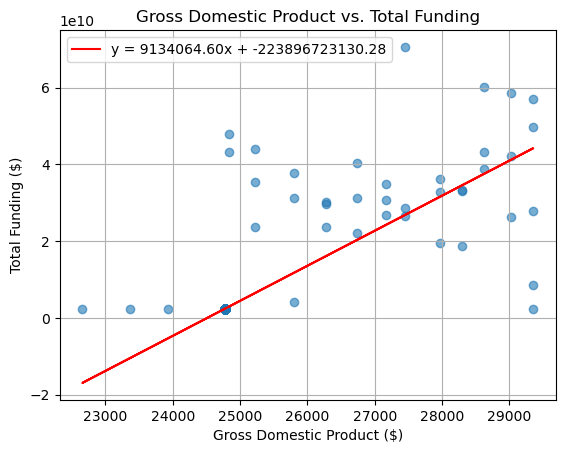

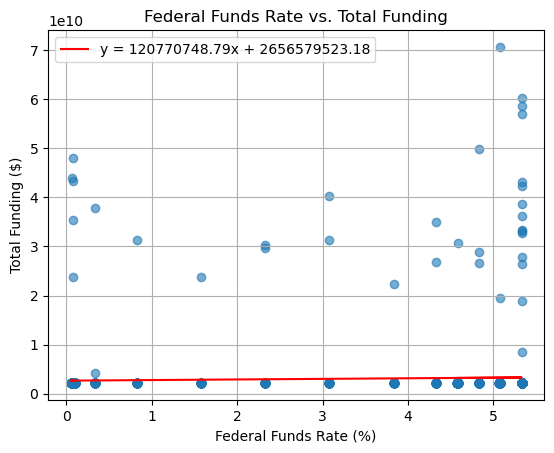

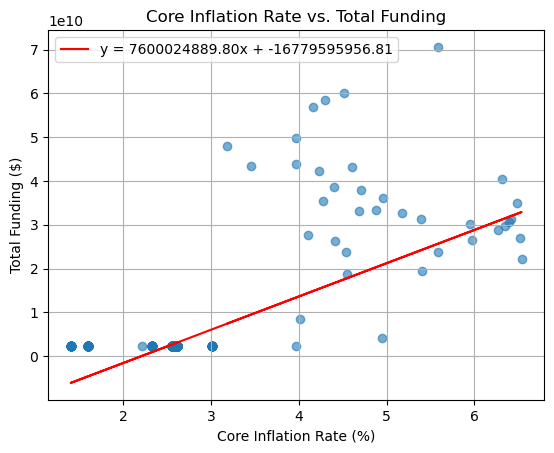

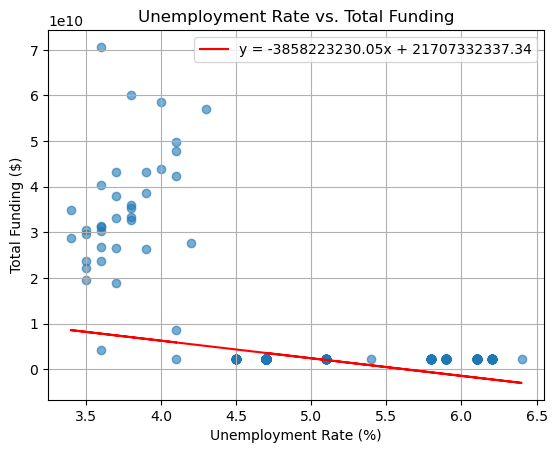

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Function to create scatter plot with a line of best fit
def scatter_with_fit(x, y, x_label, y_label, title):
    # Scatter plot
    plt.scatter(x, y, alpha=0.6)
    
    # Calculate the line of best fit
    slope, intercept = np.polyfit(x, y, 1)
    best_fit_line = slope * np.array(x) + intercept
    
    # Plot the line of best fit
    plt.plot(x, best_fit_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")
    
    # Add labels and title
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.show()

# GDP vs. Total Funding
scatter_with_fit(
    merged_df["Gross Domestic Product"], 
    merged_df["Total Funding"], 
    "Gross Domestic Product ($)", 
    "Total Funding ($)", 
    "Gross Domestic Product vs. Total Funding"
)

# Federal Funds Rate vs. Total Funding
scatter_with_fit(
    merged_df["Federal Funds Rate"], 
    merged_df["Total Funding"], 
    "Federal Funds Rate (%)", 
    "Total Funding ($)", 
    "Federal Funds Rate vs. Total Funding"
)

# Core Inflation Rate vs. Total Funding
scatter_with_fit(
    merged_df["Core Inflation Rate"], 
    merged_df["Total Funding"], 
    "Core Inflation Rate (%)", 
    "Total Funding ($)", 
    "Core Inflation Rate vs. Total Funding"
)

# Unemployment Rate vs. Total Funding
scatter_with_fit(
    merged_df["Unemployment Rate"], 
    merged_df["Total Funding"], 
    "Unemployment Rate (%)", 
    "Total Funding ($)", 
    "Unemployment Rate vs. Total Funding"
)


In [52]:
import numpy as np

# Function to calculate correlation and R²
def calculate_relationships(x, y, x_label, y_label):
    # Calculate correlation
    correlation = np.corrcoef(x, y)[0, 1]
    
    # Calculate line of best fit
    slope, intercept = np.polyfit(x, y, 1)
    
    # Calculate R²
    r_squared = correlation ** 2
    
    print(f"{x_label} vs. {y_label}:")
    print(f"  Correlation Coefficient (r): {correlation:.2f}")
    print(f"  Coefficient of Determination (R²): {r_squared:.2f}")
    print(f"  Line of Best Fit: y = {slope:.2f}x + {intercept:.2f}")
    print()

# Calculate relationships for each pair of variables
calculate_relationships(
    merged_df["Gross Domestic Product"], 
    merged_df["Total Funding"], 
    "Gross Domestic Product", 
    "Total Funding"
)

calculate_relationships(
    merged_df["Federal Funds Rate"], 
    merged_df["Total Funding"], 
    "Federal Funds Rate", 
    "Total Funding"
)

calculate_relationships(
    merged_df["Core Inflation Rate"], 
    merged_df["Total Funding"], 
    "Core Inflation Rate", 
    "Total Funding"
)

calculate_relationships(
    merged_df["Unemployment Rate"], 
    merged_df["Total Funding"], 
    "Unemployment Rate", 
    "Total Funding"
)


Gross Domestic Product vs. Total Funding:
  Correlation Coefficient (r): 0.80
  Coefficient of Determination (R²): 0.63
  Line of Best Fit: y = 9134064.60x + -223896723130.28

Federal Funds Rate vs. Total Funding:
  Correlation Coefficient (r): 0.05
  Coefficient of Determination (R²): 0.00
  Line of Best Fit: y = 120770748.79x + 2656579523.18

Core Inflation Rate vs. Total Funding:
  Correlation Coefficient (r): 0.69
  Coefficient of Determination (R²): 0.47
  Line of Best Fit: y = 7600024889.80x + -16779595956.81

Unemployment Rate vs. Total Funding:
  Correlation Coefficient (r): -0.33
  Coefficient of Determination (R²): 0.11
  Line of Best Fit: y = -3858223230.05x + 21707332337.34



In [53]:
# Overview of the dataset
def dataset_overview(df):
    # Total rows in the dataset
    total_rows = len(df)
    
    # Unique industries
    unique_industries = df["Industry 1"].nunique()
    
    # Total money raised
    total_money_raised = df["Money Raised"].sum()
    
    # Unique cities
    unique_cities = df["City"].nunique()
    
    # Unique states
    unique_states = df["State"].nunique()
    
    # Unique companies
    unique_companies = df["Company"].nunique()

    print("Dataset Overview:")
    print(f"Total Rows: {total_rows}")
    print(f"Unique Industries: {unique_industries}")
    print(f"Total Money Raised: ${total_money_raised:,.2f}")
    print(f"Unique Cities: {unique_cities}")
    print(f"Unique States: {unique_states}")
    print(f"Unique Companies: {unique_companies}")

# Call the function on your dataset
dataset_overview(combined_df)


Dataset Overview:
Total Rows: 64324
Unique Industries: 645
Total Money Raised: $1,252,028,595,841.00
Unique Cities: 3970
Unique States: 51
Unique Companies: 47099


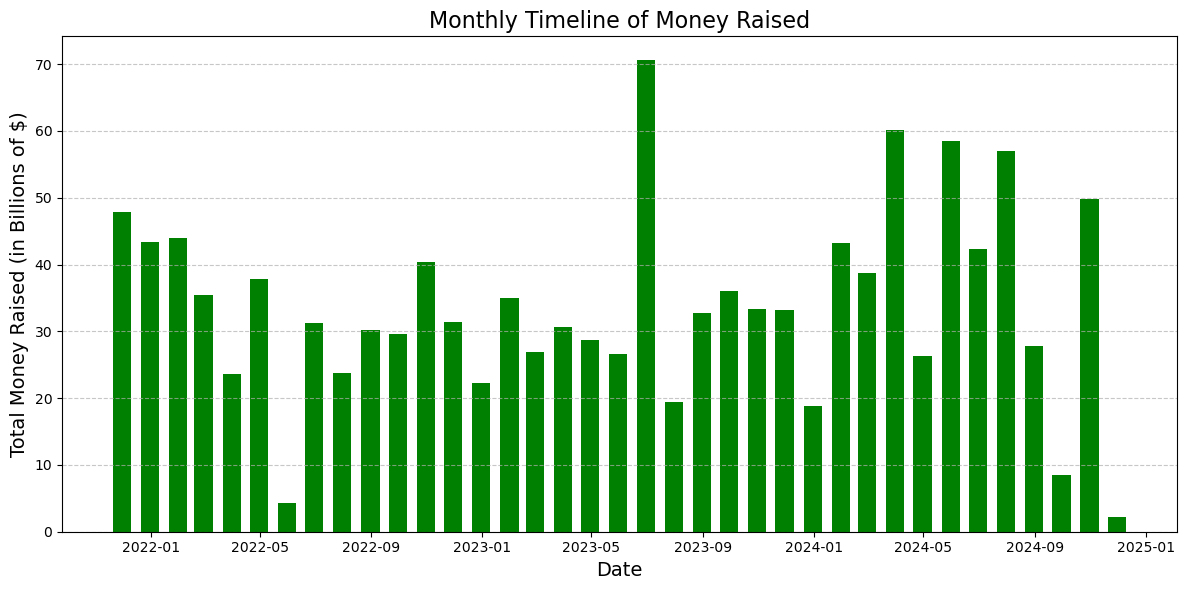

In [56]:
# Convert Money Raised to billions
monthly_timeline = combined_df.resample("M", on="Date")["Money Raised"].sum() / 1e9

# Plot the aggregated timeline
plt.figure(figsize=(12, 6))
plt.bar(monthly_timeline.index, monthly_timeline.values, color='green', width=20)
plt.title("Monthly Timeline of Money Raised", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Total Money Raised (in Billions of $)", fontsize=14)  # Updated label
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [61]:
# Group by Date and Industry, then sum up Money Raised
industry_funding_by_date = combined_df.groupby([combined_df["Date"].dt.to_period("M"), "Industry 1"])["Money Raised"].sum()

# Convert the PeriodIndex to DateTimeIndex
industry_funding_by_date.index = industry_funding_by_date.index.set_levels(
    industry_funding_by_date.index.levels[0].to_timestamp(), level=0
)

# Reset the index
industry_funding_by_date = industry_funding_by_date.reset_index()

# Rename columns
industry_funding_by_date.rename(columns={"Date": "Date", "Money Raised": "Total Funding"}, inplace=True)

# Display the industry funding dataset
print(industry_funding_by_date.head())


        Date     Industry 1  Total Funding
0 2021-11-01    3D Printing    201685073.0
1 2021-11-01  3D Technology     41090000.0
2 2021-11-01    A/B Testing            0.0
3 2021-11-01     Accounting     47110000.0
4 2021-11-01     Ad Network       615000.0


In [62]:
# Merge with economic indicators
industry_merged_df = industry_funding_by_date.merge(gdp_df, on="Date", how="outer")
industry_merged_df = industry_merged_df.merge(interest_df, on="Date", how="outer")
industry_merged_df = industry_merged_df.merge(inflation_df, on="Date", how="outer")
industry_merged_df = industry_merged_df.merge(unrate_df, on="Date", how="outer")

# Fill missing values
industry_merged_df.fillna(method="ffill", inplace=True)

# Display the merged dataset
print(industry_merged_df.head())


        Date     Industry 1  Total Funding  Gross Domestic Product  \
0 2021-11-01    3D Printing    201685073.0                     NaN   
1 2021-11-01  3D Technology     41090000.0                     NaN   
2 2021-11-01    A/B Testing            0.0                     NaN   
3 2021-11-01     Accounting     47110000.0                     NaN   
4 2021-11-01     Ad Network       615000.0                     NaN   

   Federal Funds Rate  Core Inflation Rate  Unemployment Rate  
0                0.08             3.184384                4.1  
1                0.08             3.184384                4.1  
2                0.08             3.184384                4.1  
3                0.08             3.184384                4.1  
4                0.08             3.184384                4.1  


In [63]:
# Calculate correlations for each industry
industry_correlations = {}

for industry in industry_merged_df["Industry 1"].unique():
    industry_data = industry_merged_df[industry_merged_df["Industry 1"] == industry]
    correlations = {
        "GDP": industry_data["Gross Domestic Product"].corr(industry_data["Total Funding"]),
        "Inflation": industry_data["Core Inflation Rate"].corr(industry_data["Total Funding"]),
        "Federal Funds Rate": industry_data["Federal Funds Rate"].corr(industry_data["Total Funding"]),
        "Unemployment Rate": industry_data["Unemployment Rate"].corr(industry_data["Total Funding"])
    }
    industry_correlations[industry] = correlations

# Convert to a DataFrame for better visualization
industry_correlation_df = pd.DataFrame.from_dict(industry_correlations, orient="index")
industry_correlation_df.reset_index(inplace=True)
industry_correlation_df.columns = ["Industry", "GDP Correlation", "Inflation Correlation", "Federal Funds Correlation", "Unemployment Correlation"]

# Display the correlation DataFrame
print(industry_correlation_df)


/Users/faizanshamsi/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/faizanshamsi/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


                             Industry  GDP Correlation  Inflation Correlation  \
0                         3D Printing        -0.157141              -0.276399   
1                       3D Technology        -0.067624               0.099369   
2                         A/B Testing         0.297789              -0.055460   
3                          Accounting         0.237191              -0.197928   
4                          Ad Network        -0.255787              -0.463336   
..                                ...              ...                    ...   
640                             Shoes              NaN                    NaN   
641                        Navigation              NaN                    NaN   
642  Robotic Process Automation (RPA)              NaN                    NaN   
643        Human Computer Interaction              NaN                    NaN   
644                    Remote Sensing              NaN                    NaN   

     Federal Funds Correlat

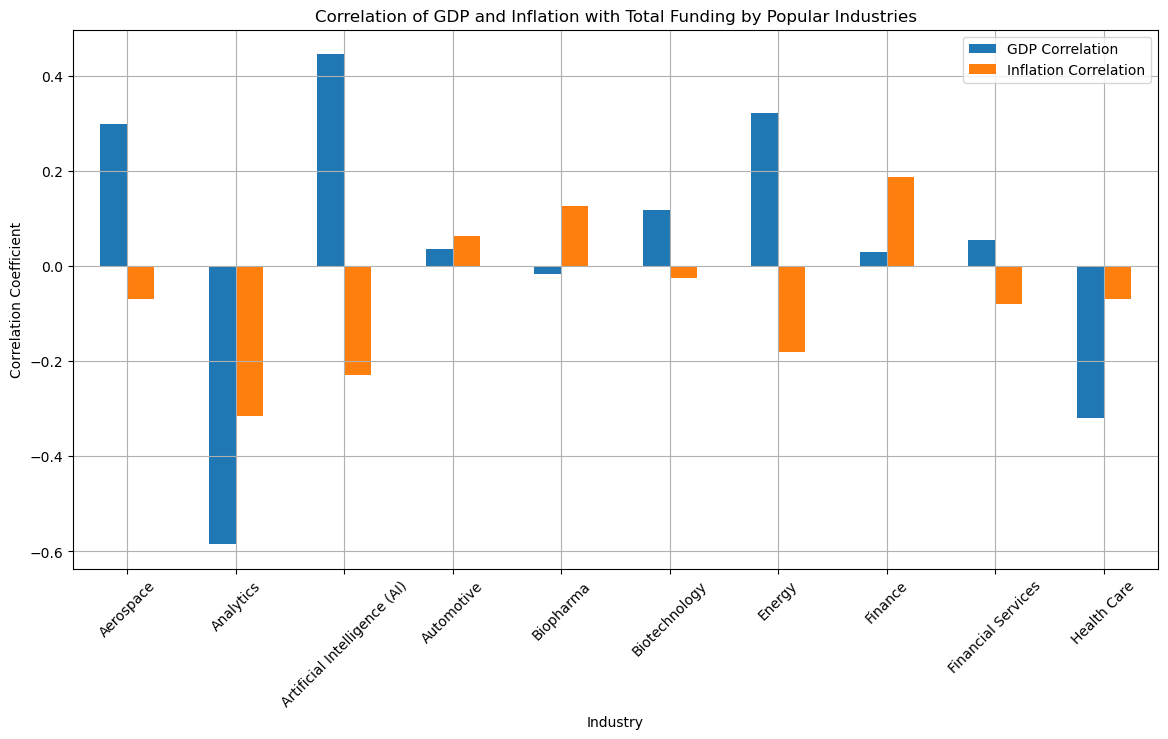

In [66]:
# Define the most popular industries (replace with your list)
popular_industries = ["Artificial Intelligence (AI)", "Biotechnology", "Energy", 
                      "Health Care", "Automotive", "Finance", "Financial Services", 
                      "Biopharma", "Analytics", "Aerospace"]

# Filter the correlation DataFrame to include only the popular industries and the relevant indicators
filtered_correlation_df = industry_correlation_df[industry_correlation_df["Industry"].isin(popular_industries)][["Industry", "GDP Correlation", "Inflation Correlation"]]

# Plot the correlations for popular industries
filtered_correlation_df.set_index("Industry").plot(kind="bar", figsize=(14, 7), grid=True)
plt.title("Correlation of GDP and Inflation with Total Funding by Popular Industries")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Industry")
plt.xticks(rotation=45)
plt.show()


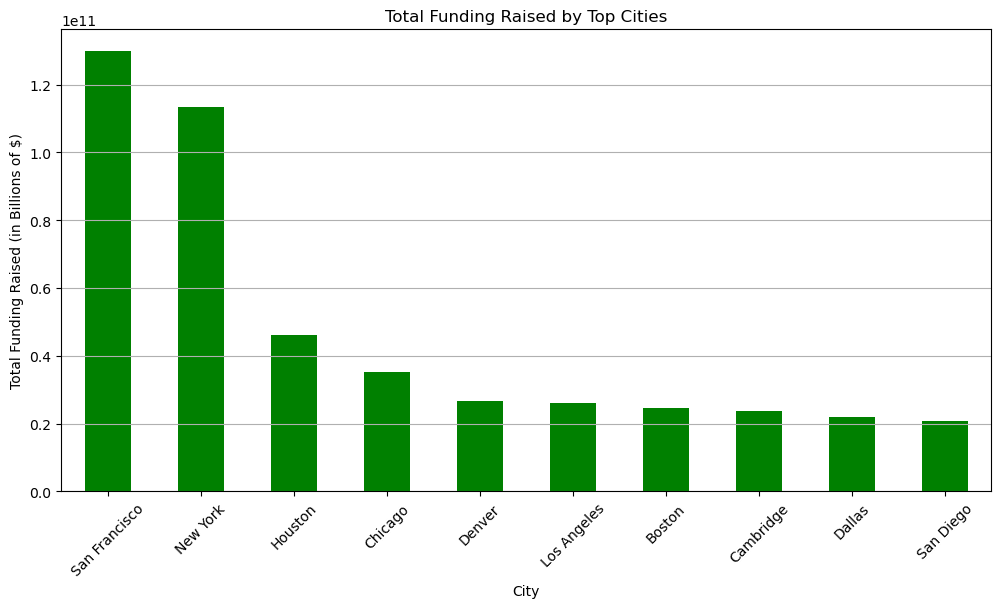

In [70]:
import matplotlib.pyplot as plt

# Step 1: Group by city and calculate the total money raised
city_funding = combined_df.groupby("City")["Money Raised"].sum().sort_values(ascending=False)

# Step 2: Get the top cities by funding (adjust the number as needed, e.g., top 10)
top_cities = city_funding.head(10)

# Step 3: Plot the bar chart
plt.figure(figsize=(12, 6))
top_cities.plot(kind="bar", color="green")
plt.title("Total Funding Raised by Top Cities")
plt.xlabel("City")
plt.ylabel("Total Funding Raised (in Billions of $)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


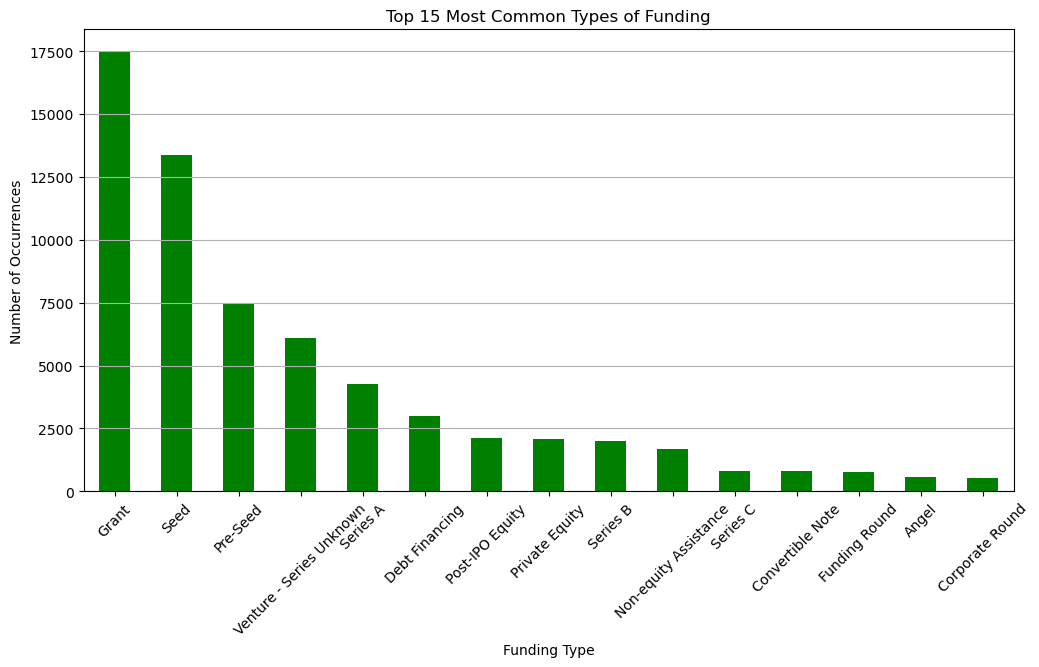

In [86]:
import matplotlib.pyplot as plt

# Step 1: Count occurrences of each funding type
funding_type_counts = combined_df["Funding Type"].value_counts()

# Step 2: Limit to the top 10 funding types
top_funding_types = funding_type_counts.head(15)

# Step 3: Plot the bar chart
plt.figure(figsize=(12, 6))
top_funding_types.plot(kind="bar", color="green")
plt.title("Top 15 Most Common Types of Funding")
plt.xlabel("Funding Type")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


Most Common Funding Types for Each Top Industry (Limited to Top 10 Funding Types):
                      Industry 1 Funding Type  Count
41                     Education        Grant   2026
16  Artificial Intelligence (AI)         Seed   1670
81                    Non Profit        Grant   1402
61                   Health Care        Grant   1254
21                 Biotechnology        Grant    734
36                    Blockchain         Seed    558
92                       Unknown         Seed    473
6                      Analytics         Seed    429
76        Information Technology         Seed    422
51             Food and Beverage        Grant    413


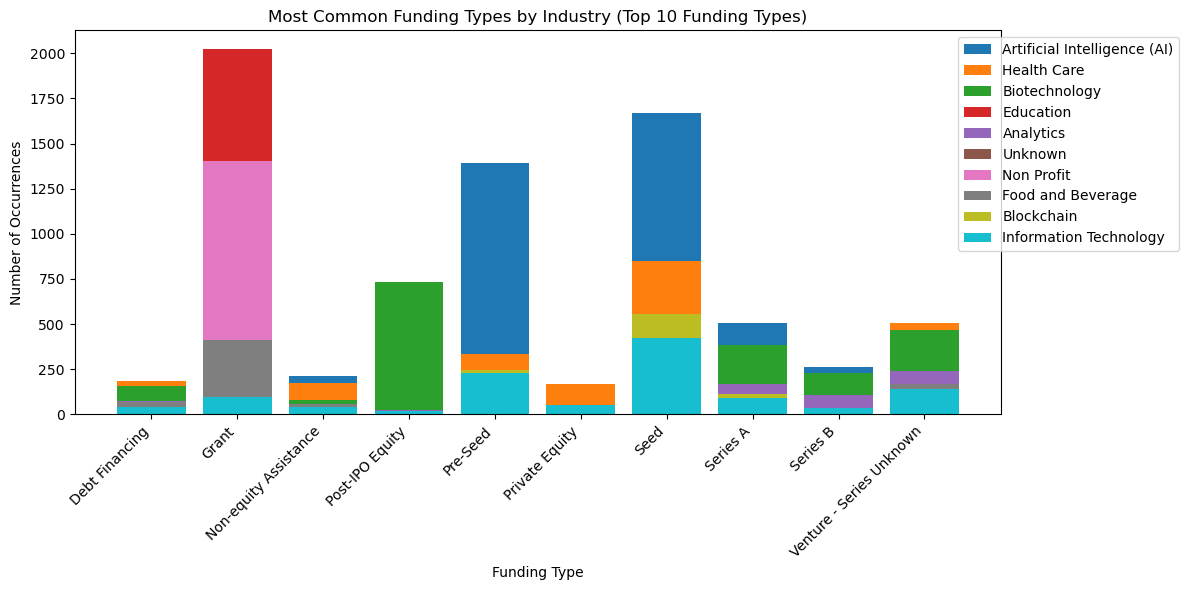

In [103]:
# Identify the top 10 most common funding types across the entire dataset
top_funding_types = (
    combined_df["Funding Type"].value_counts().head(10).index.tolist()
)

# Filter the dataset to include only the top industries and top funding types
filtered_df = combined_df[
    (combined_df["Industry 1"].isin(top_industries)) &
    (combined_df["Funding Type"].isin(top_funding_types))
]

# Group by Industry and Funding Type, then count occurrences
funding_by_type = (
    filtered_df.groupby(["Industry 1", "Funding Type"])
    .size()
    .reset_index(name="Count")
)

# Find the most common funding type for each industry
most_common_funding = (
    funding_by_type.loc[funding_by_type.groupby("Industry 1")["Count"].idxmax()]
    .sort_values(by="Count", ascending=False)
)

# Display the most common funding type for each top industry
print("Most Common Funding Types for Each Top Industry (Limited to Top 10 Funding Types):")
print(most_common_funding)

# Plot bar chart for the filtered funding types
plt.figure(figsize=(12, 6))
for industry in top_industries:
    industry_data = funding_by_type[funding_by_type["Industry 1"] == industry]
    plt.bar(industry_data["Funding Type"], industry_data["Count"], label=industry)

plt.title("Most Common Funding Types by Industry (Top 10 Funding Types)")
plt.xlabel("Funding Type")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=45, ha="right")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

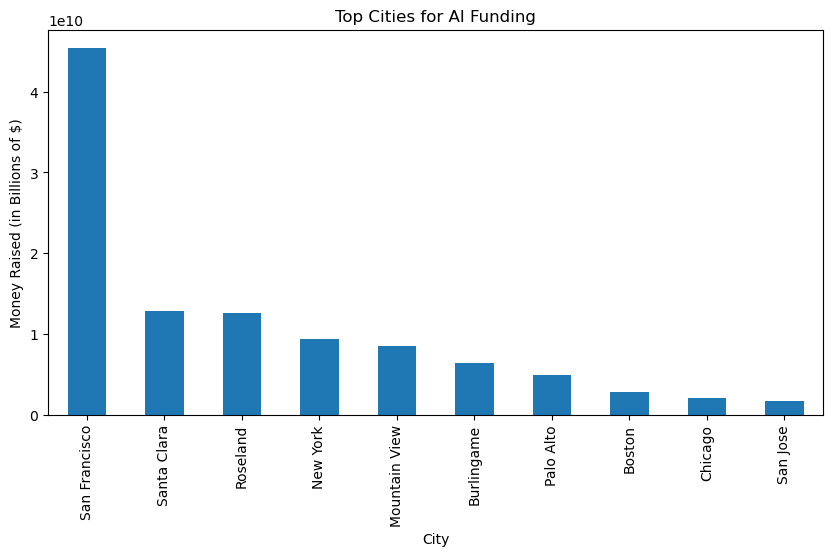

In [77]:
industry_city = combined_df.groupby(["Industry 1", "City"])["Money Raised"].sum().unstack()
top_industry_city = industry_city.loc["Artificial Intelligence (AI)"]  # Replace with any industry
top_industry_city.sort_values(ascending=False).head(10).plot(kind="bar", figsize=(10, 5))
plt.title("Top Cities for AI Funding")
plt.ylabel("Money Raised (in Billions of $)")
plt.show()


Month with the highest funding: 2023-06-01 00:00:00, Amount: 70638934672.0
Industries contributing to the spike:
Industry 1
Automotive            1.857360e+10
Insurance             7.233800e+09
Financial Services    4.827035e+09
Energy                4.379836e+09
Consumer              2.769671e+09
Name: Money Raised, dtype: float64

Funding types contributing to the spike:
Funding Type
Debt Financing              3.965589e+10
Private Equity              7.840830e+09
Post-IPO Equity             6.401110e+09
Post-IPO Secondary          3.585233e+09
Venture - Series Unknown    2.736746e+09
Name: Money Raised, dtype: float64


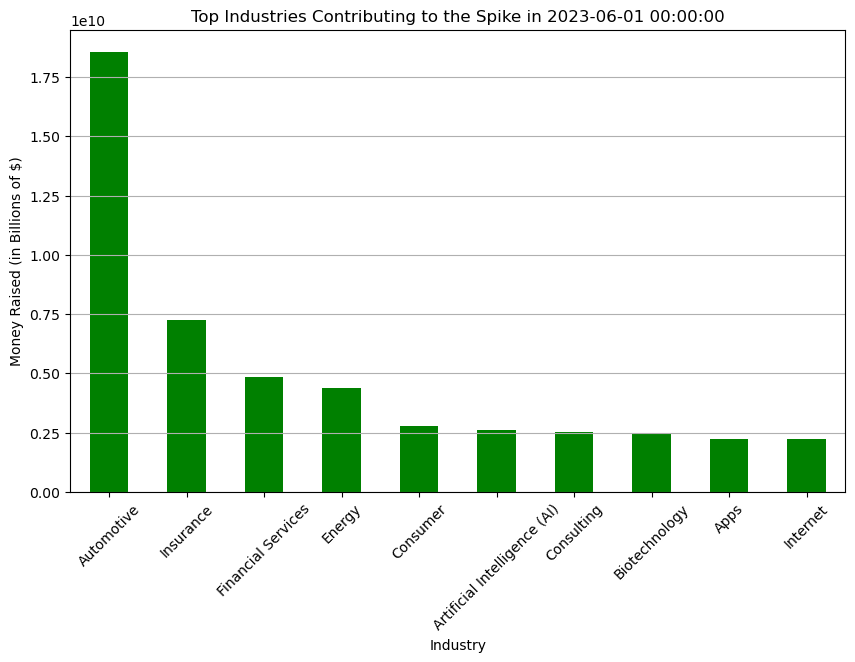

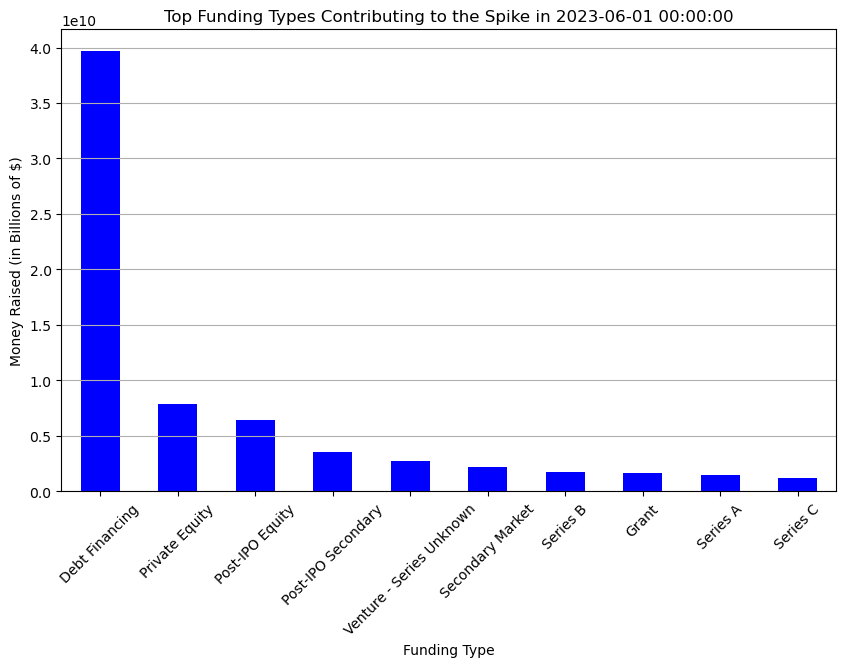

In [82]:
# Find the month with the highest funding
peak_month = funding_by_date.loc[funding_by_date["Total Funding"].idxmax()]
print(f"Month with the highest funding: {peak_month['Date']}, Amount: {peak_month['Total Funding']}")

# Filter the original dataset for that month
spike_data = combined_df[combined_df["Date"].dt.to_period("M") == peak_month["Date"].to_period("M")]

# Group by industry and funding type to understand contributions
spike_industries = spike_data.groupby("Industry 1")["Money Raised"].sum().sort_values(ascending=False)
spike_funding_types = spike_data.groupby("Funding Type")["Money Raised"].sum().sort_values(ascending=False)

# Display the results
print("Industries contributing to the spike:")
print(spike_industries.head())

print("\nFunding types contributing to the spike:")
print(spike_funding_types.head())

# Optional: Visualize the contributions
import matplotlib.pyplot as plt

# Industries
plt.figure(figsize=(10, 6))
spike_industries.head(10).plot(kind="bar", color="green")
plt.title(f"Top Industries Contributing to the Spike in {peak_month['Date']}")
plt.xlabel("Industry")
plt.ylabel("Money Raised (in Billions of $)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Funding Types
plt.figure(figsize=(10, 6))
spike_funding_types.head(10).plot(kind="bar", color="blue")
plt.title(f"Top Funding Types Contributing to the Spike in {peak_month['Date']}")
plt.xlabel("Funding Type")
plt.ylabel("Money Raised (in Billions of $)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


Month with the highest funding: 2023-06-01 00:00:00, Amount: 70638934672.0
Top Companies Contributing to the Spike:
Company
Ford Motor                                 9.200000e+09
BlueOval SK                                9.200000e+09
HUB International                          6.900000e+09
Qualtrics                                  2.750000e+09
Freepoint Commodities                      2.500000e+09
Invenergy                                  2.500000e+09
Northern Indiana Public Service Company    2.150000e+09
AT&T Mobility II                           2.000000e+09
GE Healthcare                              1.950000e+09
Inflection AI                              1.300000e+09
Name: Money Raised, dtype: float64


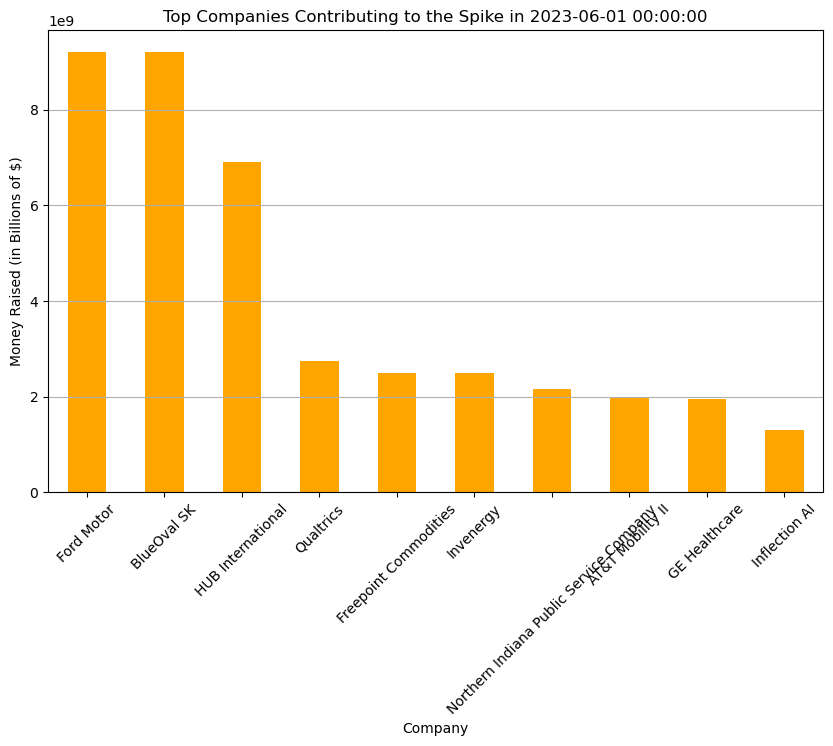

In [83]:
# Find the month with the highest funding
peak_month = funding_by_date.loc[funding_by_date["Total Funding"].idxmax()]
print(f"Month with the highest funding: {peak_month['Date']}, Amount: {peak_month['Total Funding']}")

# Filter the original dataset for that month
spike_data = combined_df[combined_df["Date"].dt.to_period("M") == peak_month["Date"].to_period("M")]

# Group by company to identify top contributors
spike_companies = spike_data.groupby("Company")["Money Raised"].sum().sort_values(ascending=False)

# Display the top contributing companies
print("Top Companies Contributing to the Spike:")
print(spike_companies.head(10))

# Optional: Visualize the top companies
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
spike_companies.head(10).plot(kind="bar", color="orange")
plt.title(f"Top Companies Contributing to the Spike in {peak_month['Date']}")
plt.xlabel("Company")
plt.ylabel("Money Raised (in Billions of $)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


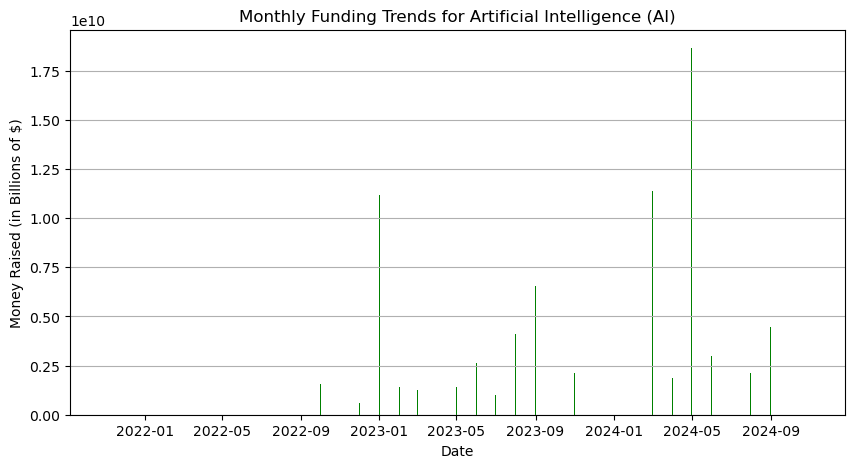

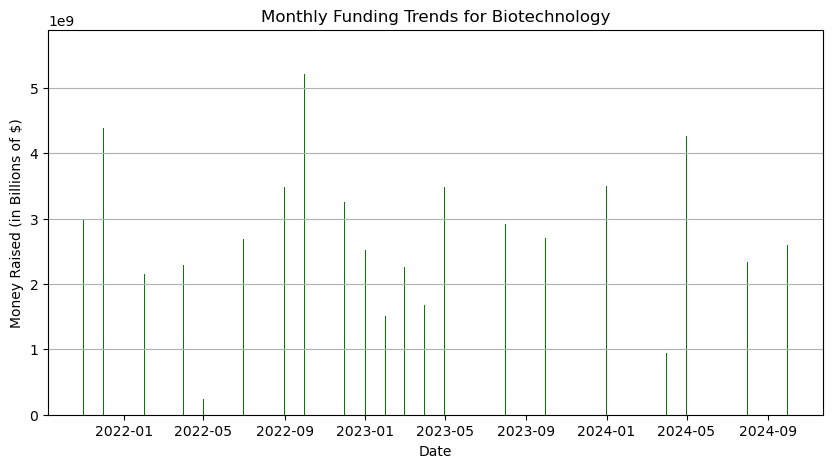

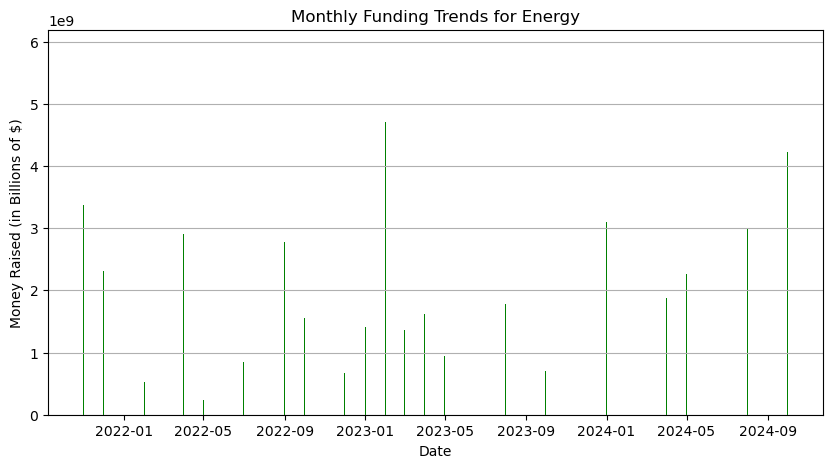

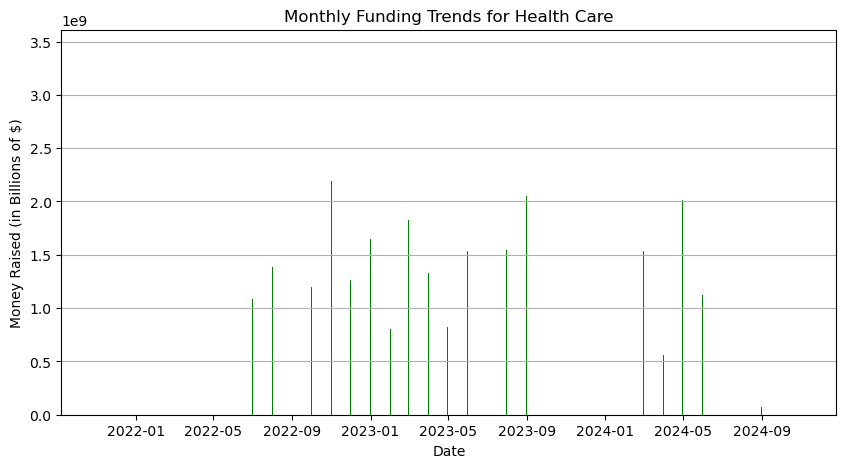

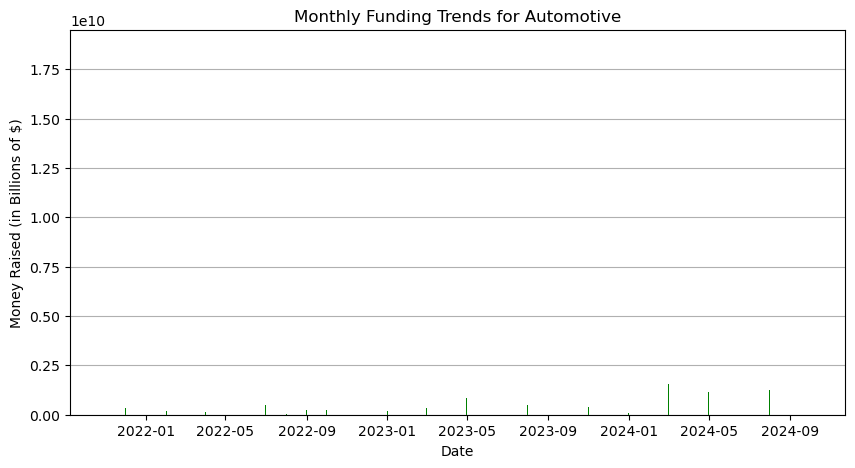

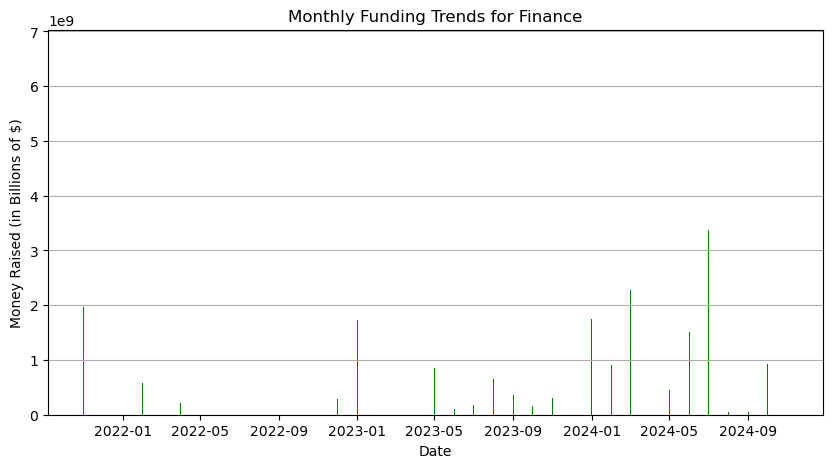

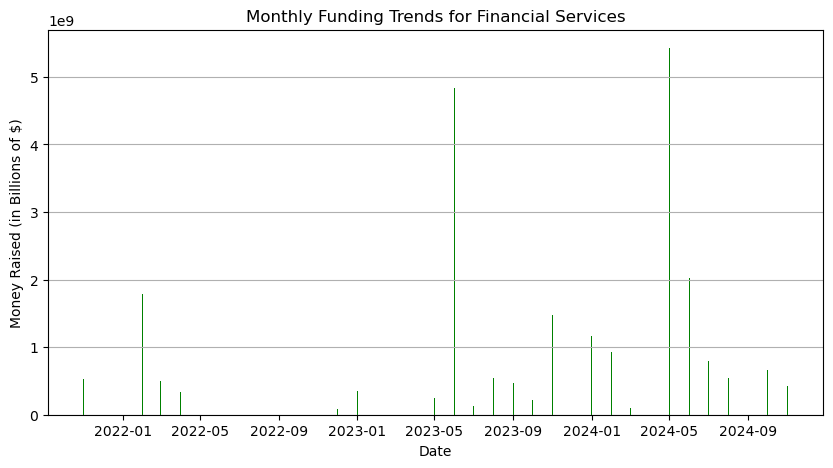

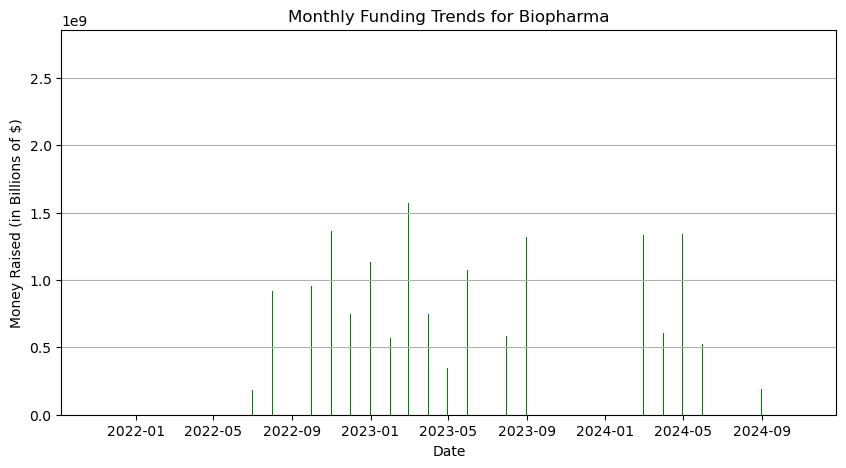

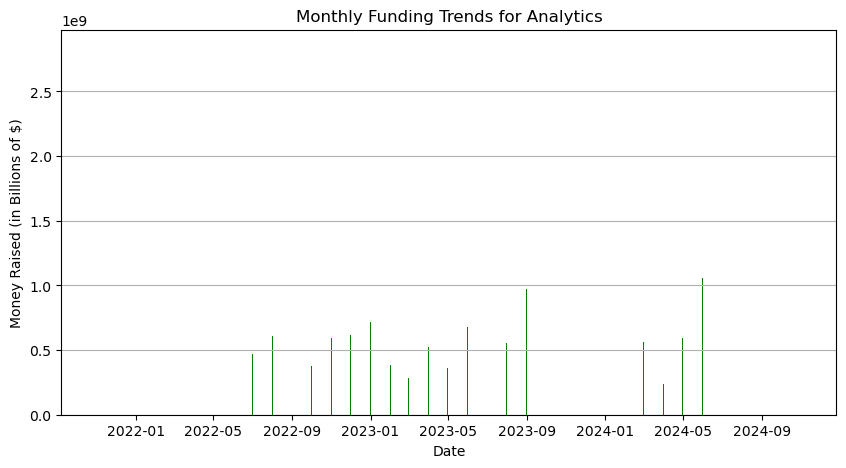

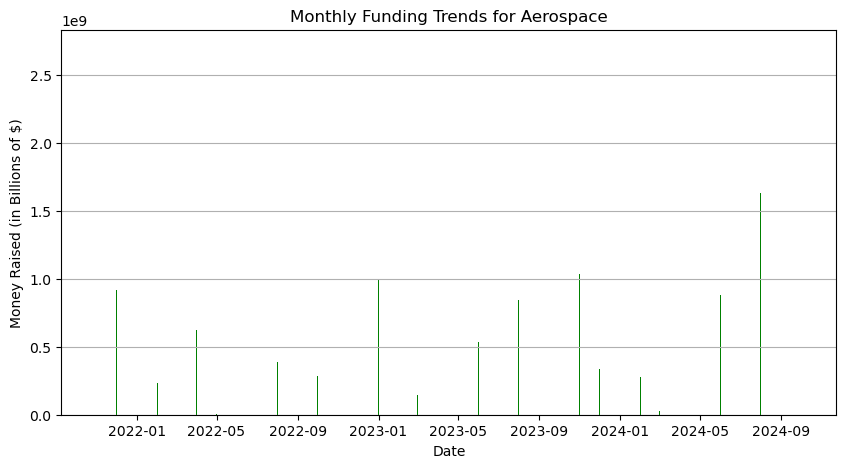

In [95]:
# Filter data for the selected industries
industries = ["Artificial Intelligence (AI)", "Biotechnology", "Energy", "Health Care", "Automotive", "Finance", "Financial Services", "Biopharma", "Analytics", "Aerospace"]
for industry in industries:
    industry_data = combined_df[combined_df["Industry 1"] == industry]
    monthly_funding = industry_data.groupby(industry_data["Date"].dt.to_period("M"))["Money Raised"].sum()
    monthly_funding.index = monthly_funding.index.to_timestamp()
    
    plt.figure(figsize=(10, 5))
    plt.bar(monthly_funding.index, monthly_funding.values, color="green")
    plt.title(f"Monthly Funding Trends for {industry}")
    plt.xlabel("Date")
    plt.ylabel("Money Raised (in Billions of $)")
    plt.grid(axis="y")
    plt.show()


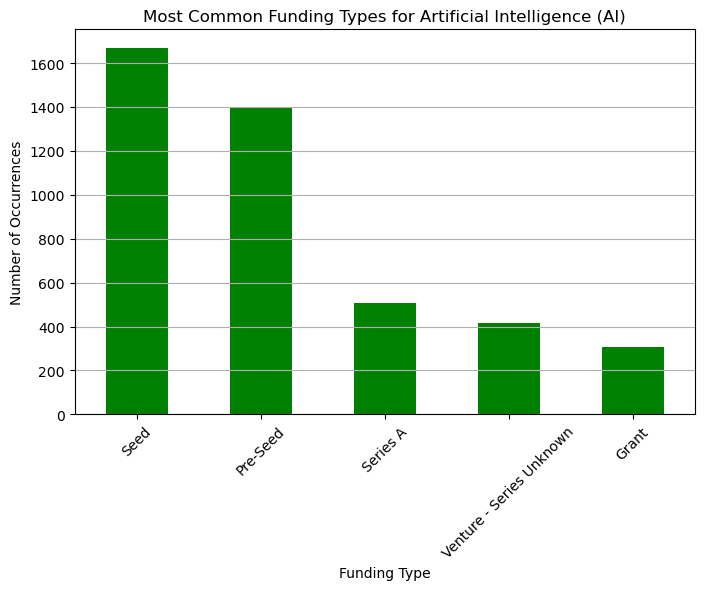

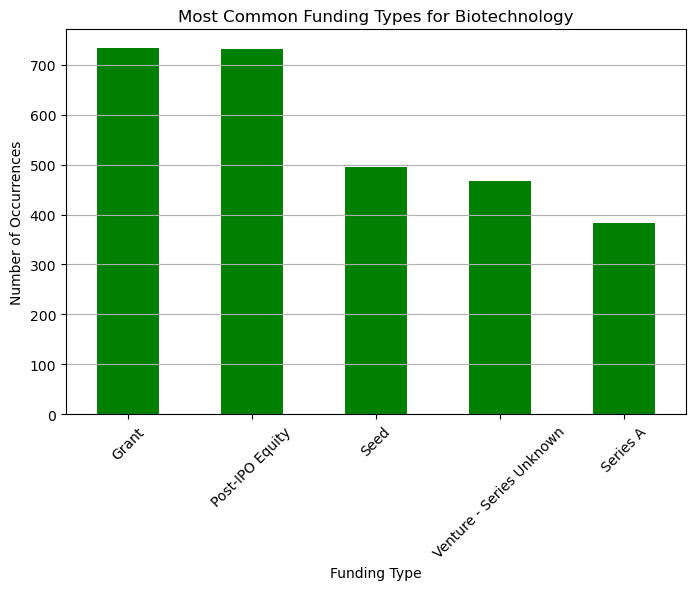

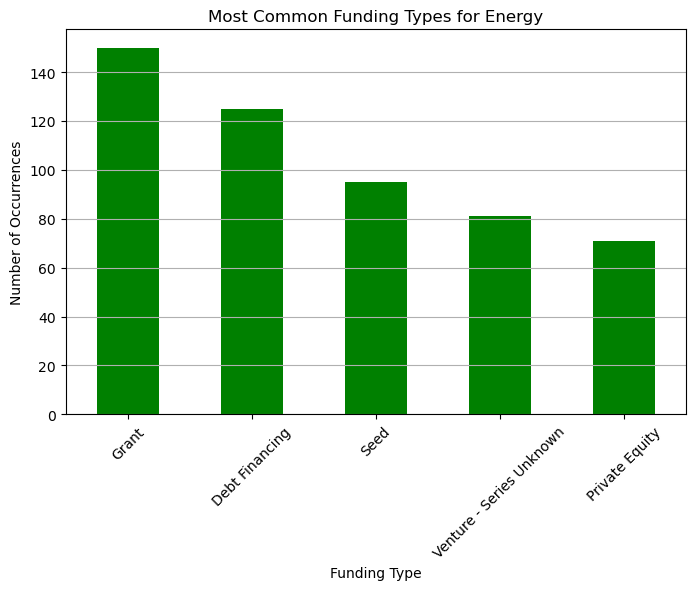

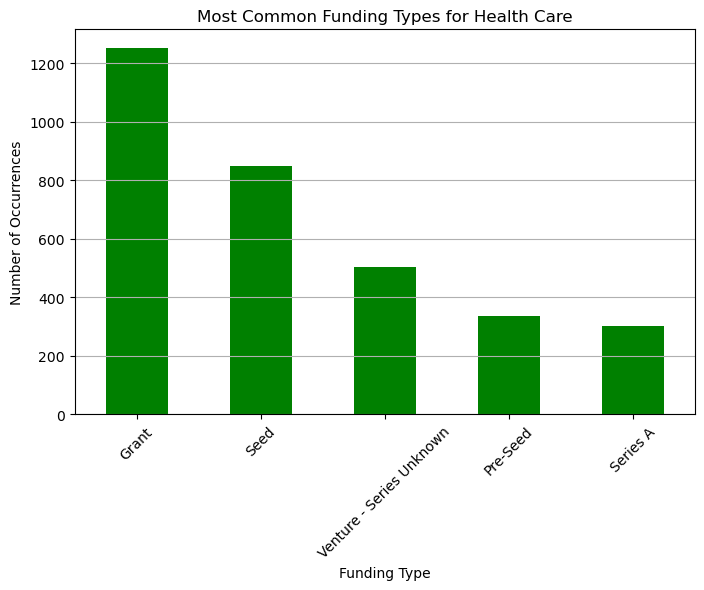

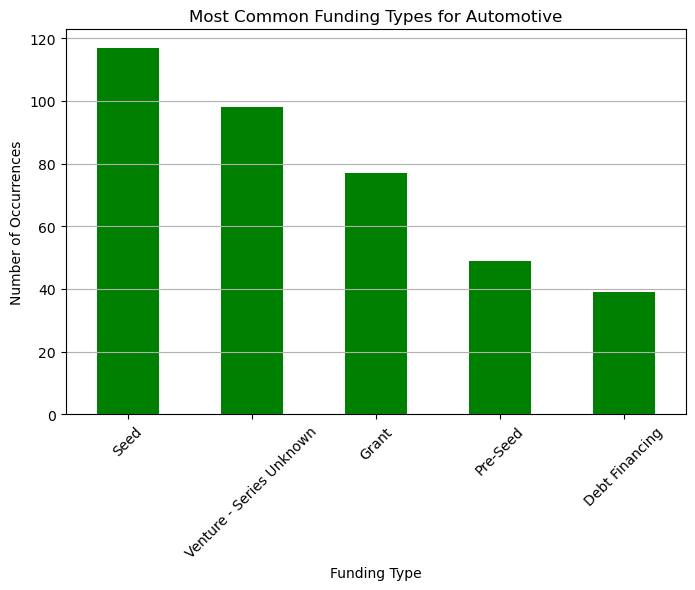

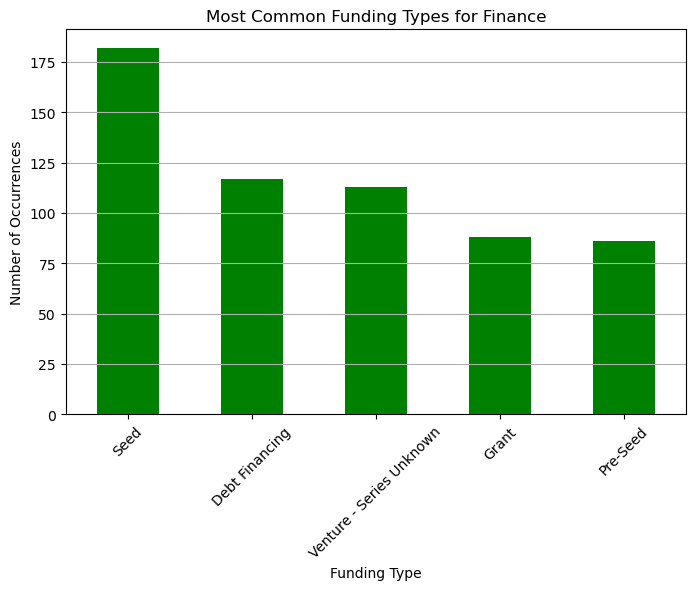

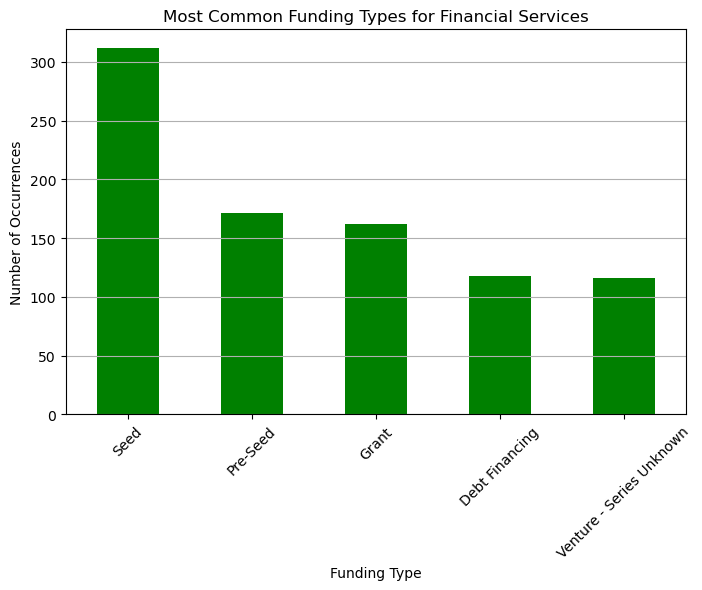

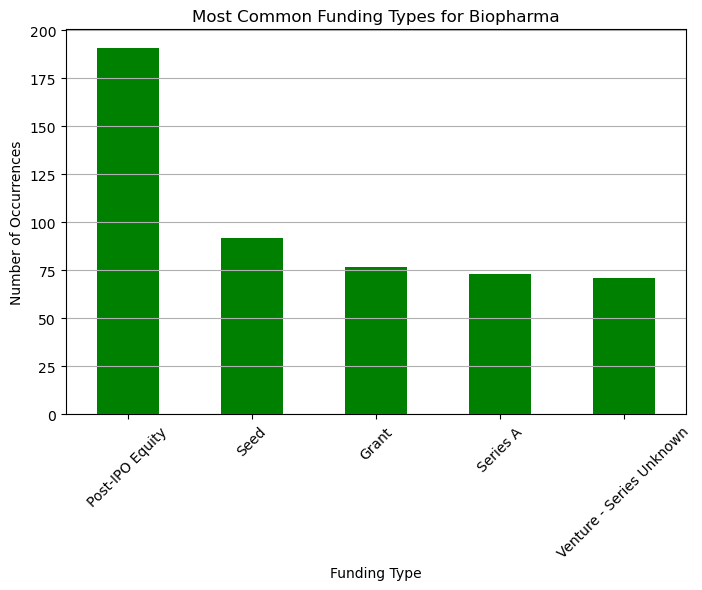

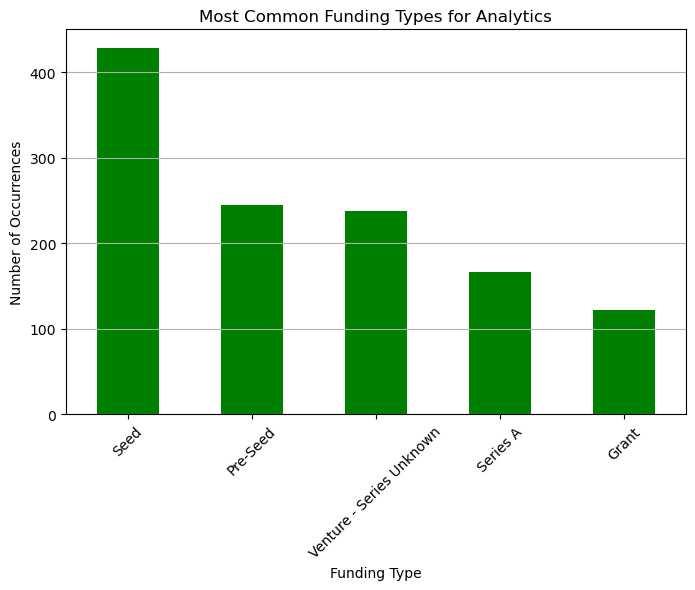

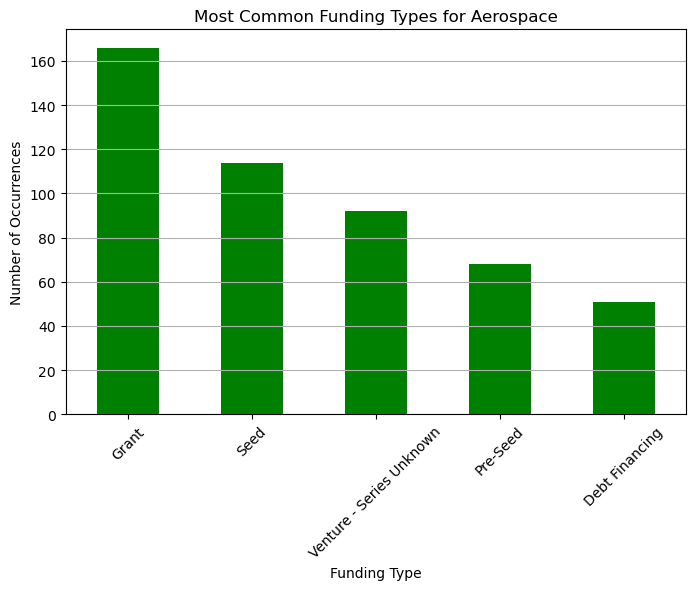

In [96]:
# Most common funding types for each industry
for industry in industries:
    industry_data = combined_df[combined_df["Industry 1"] == industry]
    funding_type_counts = industry_data["Funding Type"].value_counts().head(5)

    plt.figure(figsize=(8, 5))
    funding_type_counts.plot(kind="bar", color="green")
    plt.title(f"Most Common Funding Types for {industry}")
    plt.xlabel("Funding Type")
    plt.ylabel("Number of Occurrences")
    plt.xticks(rotation=45)
    plt.grid(axis="y")
    plt.show()


In [97]:
for industry in industries:
    industry_data = combined_df[combined_df["Industry 1"] == industry]
    total_funding = industry_data.groupby(industry_data["Date"].dt.year)["Money Raised"].sum()
    
    growth_rate = ((total_funding.iloc[-1] - total_funding.iloc[0]) / total_funding.iloc[0]) * 100
    print(f"{industry} Funding Growth Rate: {growth_rate:.2f}%")


Artificial Intelligence (AI) Funding Growth Rate: 1385.35%
Biotechnology Funding Growth Rate: 336.31%
Energy Funding Growth Rate: 381.01%
Health Care Funding Growth Rate: 118.45%
Automotive Funding Growth Rate: 137.58%
Finance Funding Growth Rate: 402.12%
Financial Services Funding Growth Rate: 642.81%
Biopharma Funding Growth Rate: 351.56%
Analytics Funding Growth Rate: 43.00%
Aerospace Funding Growth Rate: 424.69%


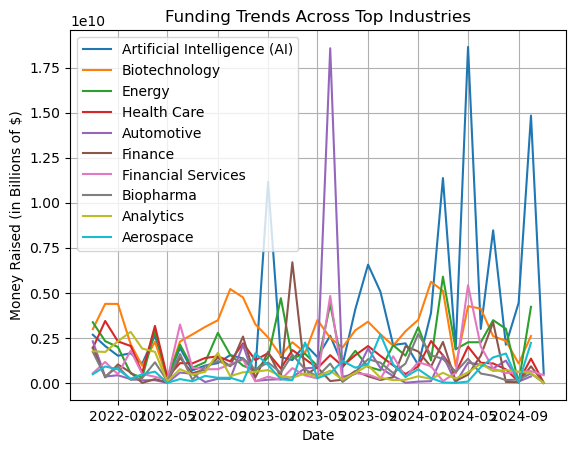

In [98]:
# Comparing total funding across industries over time
for industry in industries:
    industry_data = combined_df[combined_df["Industry 1"] == industry]
    monthly_funding = industry_data.groupby(industry_data["Date"].dt.to_period("M"))["Money Raised"].sum()
    monthly_funding.index = monthly_funding.index.to_timestamp()
    plt.plot(monthly_funding.index, monthly_funding.values, label=industry)

plt.title("Funding Trends Across Top Industries")
plt.xlabel("Date")
plt.ylabel("Money Raised (in Billions of $)")
plt.legend()
plt.grid(True)
plt.show()


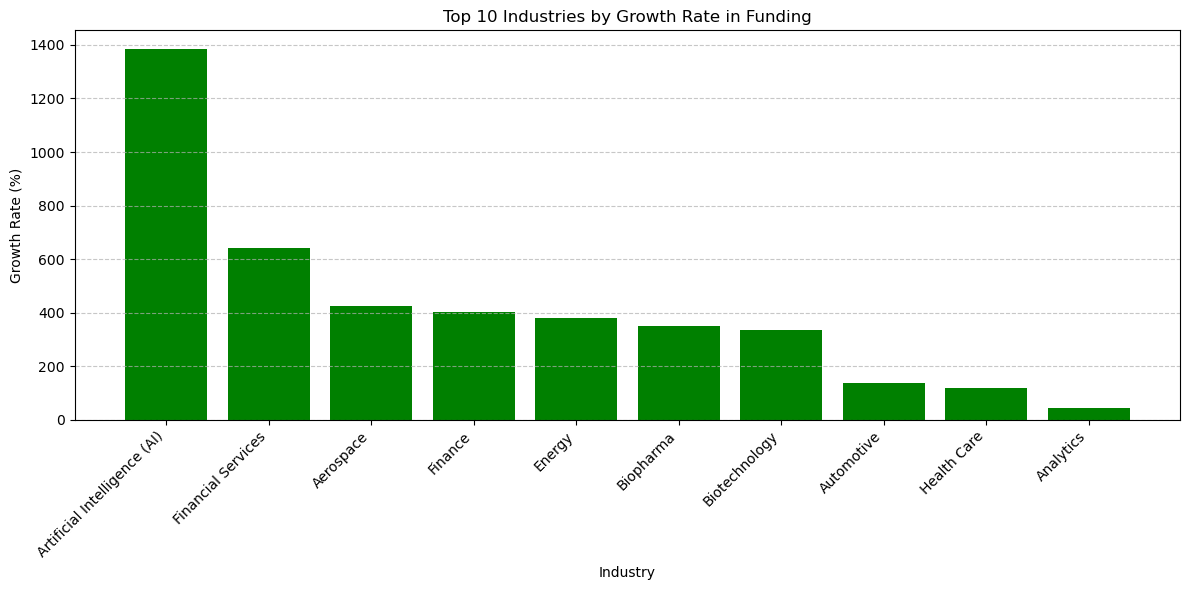

In [99]:
import matplotlib.pyplot as plt

# Step 1: Calculate growth rates and store them in a dictionary
growth_rates = {}

for industry in industries:
    industry_data = combined_df[combined_df["Industry 1"] == industry]
    total_funding = industry_data.groupby(industry_data["Date"].dt.year)["Money Raised"].sum()
    
    # Ensure there are at least two years of data to calculate growth
    if len(total_funding) > 1:
        growth_rate = ((total_funding.iloc[-1] - total_funding.iloc[0]) / total_funding.iloc[0]) * 100
        growth_rates[industry] = growth_rate

# Step 2: Sort industries by growth rates in descending order
sorted_growth_rates = sorted(growth_rates.items(), key=lambda x: x[1], reverse=True)

# Step 3: Prepare data for the bar chart (top 10 industries)
top_industries, top_rates = zip(*sorted_growth_rates[:10])

# Step 4: Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_industries, top_rates, color="green")
plt.title("Top 10 Industries by Growth Rate in Funding")
plt.xlabel("Industry")
plt.ylabel("Growth Rate (%)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [100]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Example dataset
x = np.array(merged_df["Gross Domestic Product"]).reshape(-1, 1)  # Independent variable
y = np.array(merged_df["Money Raised"])  # Dependent variable

# Fit the model
model = LinearRegression()
model.fit(x, y)

# Make predictions
predictions = model.predict(x)

# Plot
plt.scatter(x, y, label="Actual Data")
plt.plot(x, predictions, color="red", label="Regression Line")
plt.title("GDP vs. Money Raised")
plt.xlabel("Gross Domestic Product")
plt.ylabel("Money Raised")
plt.legend()
plt.show()


KeyError: 'Money Raised'